<img src="nicfi-logo.png" alt="Leap Image" width="150" style="float: right;"/>

### Project: UNODC - LEAP    
first:17/12/24 last : 09/07/25


![Leap Image](leap.jpg)


This report presents a collaborative initiative developed within the framework of the UNODC's strategic efforts to combat forest crimes. The LEAP Program (Law Enforcement Assistance Programme to Reduce Tropical Deforestation) is a partnership between INTERPOL and several key branches of UNODC, including the Container Control Program (CCP), the Global Program against Money Laundering (GPML), and the Global Maritime Crime Program (GMCP), with support from Norway's International Climate and Forest Initiative (NICFI). 

Through a combination of operational support, investigative training, and interagency cooperation, the program seeks to strengthen the capacities of law enforcement and customs authorities in Latin America and Southeast Asia. The aim is to identify and disrupt illegal timber supply chains, uncover associated financial crimes, and reduce deforestation and biodiversity loss. In Brazil, the program operates across six major ports, and is also active in Colombia and Peru. By promoting cross-sectoral collaboration, LEAP contributes directly to the achievement of the Sustainable Development Goals (SDGs), particularly those related to environmental protection, justice, and institutional effectiveness.


In [1]:
# File system and utility tools
import os
import glob
import pickle
import random

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Image processing and visualization
from PIL import Image
import matplotlib.pyplot as plt

# Signal processing and mathematical tools
from scipy import signal

# Deep Learning with TensorFlow/Keras
import tensorflow as tf
from keras import backend as K, metrics, layers
from keras.models import Model, Sequential, load_model
from keras.layers import (
    Input, Dense, Activation, ZeroPadding2D, BatchNormalization,
    Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout,
    GlobalMaxPooling2D, GlobalAveragePooling2D, Concatenate
)
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
# from keras.utils import plot_model  # Uncomment if needed

# Performance evaluation
from sklearn.metrics import confusion_matrix


## Data set


 There are 28 species/gender in the data set, indentified throught a three letters code, as follow:
 
    unique_spec = ['ALL', 'ASP', 'ASPd', 'ASPp', 'AST', 'BAG', 'BER', 'BOW', 'BRO', 'CAR', 'CARI', 'CHR', 'CLA', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'GOU', 'HYM', 'MAN', 'POU', 'QUA', 'RUI', 'SEX', 'VAT']

In [2]:
unique_spec = ['ALL', 'ASP', 'ASPd', 'ASPp', 'AST', 'BAG', 'BER', 'BOW', 'BRO', 'CAR', 'CARI', 'CHR', 'CLA', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'GOU', 'HYM', 'MAN', 'POU', 'QUA', 'RUI', 'SEX', 'VAT']

In [3]:
print(unique_spec)

['ALL', 'ASP', 'ASPd', 'ASPp', 'AST', 'BAG', 'BER', 'BOW', 'BRO', 'CAR', 'CARI', 'CHR', 'CLA', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'GOU', 'HYM', 'MAN', 'POU', 'QUA', 'RUI', 'SEX', 'VAT']


    Select the image path with se same species or gender

In [10]:
import os

def list_matching_files(directory, keyword):
    """
    Recursively lists all .jpg files in the given directory and subdirectories
    whose full path contains a specific keyword.

    Parameters:
    - directory (str): Root directory to search in.
    - keyword (str): Substring to search for in the file paths.

    Returns:
    - List[str]: List of matching file paths.
    """
    matching_files = []

    # Walk through the directory and its subdirectories
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.jpg'):
                full_path = os.path.join(root, file)
                if keyword in full_path:
                    matching_files.append(full_path)
    
    return matching_files

# Example usage
path = 'D:/UNO/'
files = list_matching_files(path, 'All')
files[:10]


['D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_09_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_18_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_34_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_08_03_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_26_12_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_26_21_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_29_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_36_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_40_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_45_Pro.jpg']

Create a imput par $$[Xpath,y]$$  where $X^ipath$ is the adress of the images and its $y^i$  class


In [11]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
y = []
Xpath = []

for i in range(len(unique_spec)):
    files = listar_arquivos(path,unique_spec[i])
    Xpath.extend(files)
    y.extend([i] * len(files))
    

    Now we shuffle the dataset, as follow:
        

In [12]:
from sklearn.utils import shuffle
import numpy as np

Xpath = np.array(Xpath)
y     = np.array(y)

np.random.seed(42)  # Set the random seed for reproducibility
Xpath, y = shuffle(Xpath, y)


    Save data

In [13]:
import pickle
# Create a dictionary to save X e y
data = {'Xpath': Xpath, 'y': y}

# Save the dictionary at a pickle file:
#with open('D:/UNO/data/data_full.pkl', 'wb') as file:
    pickle.dump(data, file)

    load the data

In [2]:
import pickle
with open('D:/UNO/data/data_full.pkl', 'rb') as file:
    data = pickle.load(file)

# Recuperar X e y do dicionário
Xpath = data['Xpath']
y = data['y']

Show sample of image     

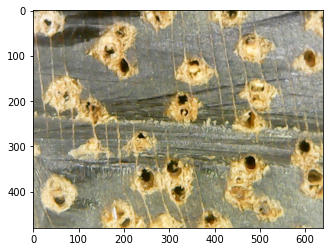

In [40]:
plt.imshow(Image.open(Xpath[1666]))
plt.show() 

### Run the neural network

    turn target into a one hot vector 

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Reshape array to 2D because OneHotEncoder expects a 2D array
integer_array_reshaped = y.reshape(-1, 1)

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse=False)  # Use sparse=False to get a 2D array instead of a sparse matrix

# Fit and transform the array
one_hot_encoded_array = encoder.fit_transform(integer_array_reshaped)

y0 = one_hot_encoded_array
print(y0[99])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


    split on training and valitation data set 

In [76]:
from sklearn.model_selection import train_test_split
Xpath_train, Xpath_val, y_train, y_val = train_test_split(Xpath, y0, test_size=0.02, random_state=42)

In [81]:
import pickle
# Create a dictionary to save X e y
data = {'Xpath_train':Xpath_train,'y_train':y_train,' Xpath_val':Xpath_val,'y_val':y_val}

# Save the dictionary at a pickle file:
with open('D:/UNO/data/data_full_train.pkl', 'wb') as file:
    pickle.dump(data, file)

In [2]:
import pickle
with open('D:/UNO/data/data_full_train.pkl', 'rb') as file:
    data = pickle.load(file)

# Recuperar X e y do dicionário
Xpath_train = data['Xpath_train']
y_train = data['y_train']


    load a pre trained model

In [3]:
from keras.models import load_model

# Load the model from the file
model = load_model('D:/UNO/data/model_UNO_neu.h5')

In [4]:
from keras.models import load_model

# Load the model from the file
model1 = load_model('D:/UNO/data/model_UNO_neu3.h5')

In [4]:
from tensorflow.keras.models import clone_model

# Clone the model architecture
model1 = clone_model(model)
model1.build(input_shape=(None, 480, 640, 3))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
from keras.models import Model
from keras.layers import Dense


# Assume you are using the Functional API and the model's input and output are as follows:
input_layer = model.input

# Get output from the second-to-last layer (skip the last layer)
last_hidden_layer = model.layers[-2].output

# Add a new Dense layer with 27 units
new_output_layer = Dense(27, activation='softmax')(last_hidden_layer)

# Create the new model
model1 = Model(inputs=input_layer, outputs=new_output_layer)

# Recompile the new model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# Now you can train your new model on the updated dataset
# new_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))


In [38]:
model1 = new_model

    Adjust the dimenstion of the output layer

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Remove the last layer of model0
model1 = Model(inputs=model.input, outputs=model.layers[-2].output)

# Add a new Dense layer with the correct number of units/classes
new_output = Dense(27, activation='softmax')(model.output)

# Create the new model
model1 = Model(inputs=model1.input, outputs=new_output)

# Compile the new model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### transfer learning.   

    We´ll use a pre trained model to starting the lernig process

In [11]:
len(model.layers)

23

In [12]:
     for i in range(1,21):
          model1.layers[i].set_weights(model.layers[i].get_weights())

### Retraining model

    trainig model

In [4]:
    bath = 250
    Xtr = np.zeros((bath, 480, 640, 3))
    ytrain = np.zeros((bath,27))
    for j in range(bath):
            pil_im            = Image.open(Xpath_train[j+bath*i])
            Xtr[j]            = np.array(pil_im)/256
        
    ytrain[0:bath]= y_train[0:bath]
    Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)

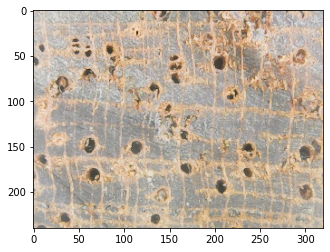

In [5]:
plt.imshow(Xtrain[248])
plt.show() 

In [14]:
    bath = 250
    Xtr = np.zeros((bath, 480, 640, 3))
    ytrain = np.zeros((bath,27))

    for i in range(20,23):
        print(i)
        for j in range(bath):
            pil_im            = Image.open(Xpath_train[j+bath*i])
            Xtr[j]            = np.array(pil_im)/256
        
        ytrain[0:bath]= y_train[i*bath:(i+1)*bath]
        Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)
        X_aug = np.concatenate([
            Xtrain,
            Xtrain[:, :, ::-1, :],  # Horizontal flip
            Xtrain[:, ::-1, :, :]   # Vertical flip
        ], axis=0)

        y_aug = np.concatenate([ytrain, ytrain, ytrain], axis=0)

        history = model1.fit(x=X_aug, y=y_aug, batch_size=64, shuffle=True, epochs=1)
        model1.save('D:/UNO/data/model_UNO_neu3.h5')

20
12/12 [==============================] - 739s 61s/step - loss: 3.1241 - accuracy: 0.1280
21
12/12 [==============================] - 740s 61s/step - loss: 3.0469 - accuracy: 0.1960
22
12/12 [==============================] - 734s 61s/step - loss: 3.0285 - accuracy: 0.1800


In [15]:
    bath = 250
    Xtr = np.zeros((bath, 480, 640, 3))
    ytrain = np.zeros((bath,27))

    for i in range(16,20):
        print(i)
        for j in range(bath):
            pil_im            = Image.open(Xpath_train[j+bath*i])
            Xtr[j]            = np.array(pil_im)/256
        
        ytrain[0:bath]= y_train[i*bath:(i+1)*bath]
        Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)
        X_aug = np.concatenate([
            Xtrain,
            Xtrain[:, :, ::-1, :],  # Horizontal flip
            Xtrain[:, ::-1, :, :]   # Vertical flip
        ], axis=0)

        y_aug = np.concatenate([ytrain, ytrain, ytrain], axis=0)

        history = model1.fit(x=X_aug, y=y_aug, batch_size=64, shuffle=True, epochs=1)
        model1.save('D:/UNO/data/model_UNO_neu3.h5')

16
12/12 [==============================] - 721s 60s/step - loss: 3.0299 - accuracy: 0.1560
17
12/12 [==============================] - 725s 60s/step - loss: 3.1143 - accuracy: 0.1480
18
12/12 [==============================] - 740s 61s/step - loss: 3.0391 - accuracy: 0.1560
19
12/12 [==============================] - 739s 61s/step - loss: 3.0589 - accuracy: 0.1680


In [ ]:
from tensorflow.keras.models import clone_model

# Clone the model architecture
model1 = clone_model(model)
model1.build(input_shape=(None, 480, 640, 3))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
X_aug = np.concatenate([
    Xtrain,
    Xtrain[:, :, ::-1, :],  # Horizontal flip
    Xtrain[:, ::-1, :, :]   # Vertical flip
], axis=0)

y_aug = np.concatenate([ytrain, ytrain, ytrain], axis=0)

history = model.fit(x=X_aug, y=y_aug, batch_size=64, shuffle=True, epochs=1)


In [ ]:
    bath = 250
    Xtr = np.zeros((bath, 480, 640, 3))
    ytrain = np.zeros((bath,27))

    for i in range(1,5):
        print(i)
        for j in range(bath):
            pil_im            = Image.open(Xpath_train[j+bath*i])
            Xtr[j]            = np.array(pil_im)/256
        
        ytrain[0:bath]= y_train[i*bath:(i+1)*bath]
        Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)
        history = model.fit( x=Xtrain, y=ytrain, batch_size=2**6, shuffle=True, epochs= 1)  
        Xtrain = Xtrain[:, :, ::-1, :]        
        history = model.fit( x=Xtrain, y=ytrain, batch_size=2**6, shuffle=True, epochs= 1)
        Xtrain = Xtrain[:, ::-1, :, :]
        history = model.fit( x=Xtrain, y=ytrain, batch_size=2**6, shuffle=True, epochs= 1)        
        model.save('D:/UNO/data/model_UNO_neu3.h5')

### Validation
    Load data

In [46]:

import pickle
with open('D:/UNO/data/data_full_train.pkl', 'rb') as file:
    data = pickle.load(file)

# Recuperar X e y do dicionário
Xpath_val = data[' Xpath_val']
y_val = data['y_val']

In [47]:
Xval_  = np.zeros((len(Xpath_val), 480, 640, 3))

for j in range(len(Xpath_val)):
    pil_im            = Image.open(Xpath_val[j])
    Xval_[j]           = np.array(pil_im)/256
    
Xval = MaxPooling2D(pool_size=(2, 2))(Xval_)    

In [34]:
bath = 150
Xtr = np.zeros((bath, 480, 640, 3))
ytrain = np.zeros((bath,27))


for j in range(bath):
    pil_im            = Image.open(Xpath_train[j])
    Xtr[j]            = np.array(pil_im)/256
    
ytrain[0:bath]= y_train[0:bath]
Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)    

In [16]:
import pickle
# Create a dictionary to save X e y
data = {'Xval': Xval, 'y_val': y_val}

# Save the dictionary at a pickle file:
with open('D:/UNO/data/data_val.pkl', 'wb') as file:
    pickle.dump(data, file)

    validate

In [30]:
# Load the model from the file
model = load_model('D:/UNO/data/model_UNO_neu2.h5')

In [22]:
#model.save('D:/UNO/data/model_UNO_21.keras')

In [58]:
# Validation

preds =model.evaluate(Xval, y_val)
print ("Loss = " + str(round(preds[0],3)))
print ("Test Accuracy = " + str(round(preds[1],4)))

5/5 [==============================] - 33s 7s/step - loss: 0.5824 - accuracy: 0.8133
Loss = 0.582
Test Accuracy = 0.8133


In [35]:
# Validation

preds =model.evaluate(Xtrain, ytrain)
print ("Loss = " + str(round(preds[0],3)))
print ("Test Accuracy = " + str(round(preds[1],4)))

5/5 [==============================] - 33s 7s/step - loss: 0.1382 - accuracy: 0.9467
Loss = 0.138
Test Accuracy = 0.9467


In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

        Resume


$$
\begin{array}{c|c|c|c}
\hline
\textbf{Model}  & \textbf{Acc. Val} & \textbf{loss Val} & \textbf{Acc. train}& \textbf{loss Train}\\
\hline
UNO_4     & .747          & 1.145 & .94      & .086\\
UNO_{15}  & .767          & .625 & .900      & .187\\
UNO_{16}  & .800          & .640 & .900      & .166\\
UNO_{20}  & .720          & .916 & .940      & .136 \\
UNO_{21}  & .830          & .475 & .950      & .082\\
UNO_{22k} & .813          & .529 & .950      & .082\\
UNO_{23k} & .787          & .805 & .910      & .169\\
UNO_{neu2}& \textbf{.833} & \textbf{.482} & .947      & .138\\
\hline
\end{array}
$$



        Run remote in GPU

In [ ]:
save_path = 'D:/UNO/data/'


    Xtrain = K.eval(Xtrain)  # Convert tensor to numpy array
    # Saving Xtrain and ytrain to pickle
    with open(os.path.join(save_path, f'Xtrain_batch_{i}.pickle'), 'wb') as f:
        pickle.dump(Xtrain, f)
    
    with open(os.path.join(save_path, f'ytrain_batch_{i}.pickle'), 'wb') as f:
        pickle.dump(ytrain, f)

In [38]:
save_path = 'D:/UNO/data/'
#save_path = 'C:/Users/affon/AppData/Local/Programs/Python/Python310/Scripts/'
bath      = 250
Xtr = np.zeros((bath, 480, 640, 3))
ytrain = np.zeros((bath,27))

for i in range(29):    
    for j in range(bath):
        pil_im            = Image.open(Xpath_train[j+bath*i])
        Xtr[j]            = np.array(pil_im)/256

        ytrain[0:bath]= y_train[i*bath:(i+1)*bath]
        Xtrain = MaxPooling2D(pool_size=(2, 2))(Xtr)
    Xtrain = K.eval(Xtrain)  # Convert tensor to numpy array
        # Saving Xtrain and ytrain to pickle
    data = {'Xtrain': Xtrain, 'ytrain': ytrain}

        # Save the dictionary at a pickle file:
    with open(save_path+f'Train_{i}.pkl', 'wb') as file:
        pickle.dump(data, file)

In [16]:
import pandas as pd

def read_first_column_of_all_sheets(path):
    # Carrega o arquivo Excel
    xls = pd.ExcelFile(path)
    
    # Lista para armazenar os dados da primeira coluna de cada planilha
    first_columns = {}
    
    # Itera sobre cada planilha no arquivo
    for sheet_name in xls.sheet_names:
        # Carrega a planilha
        df = pd.read_excel(xls, sheet_name=sheet_name)
        # Verifica se a planilha está vazia
        if not df.empty:
            # Armazena a primeira coluna da planilha
            first_columns[sheet_name] = df.iloc[:, 0]  # '.iloc[:, 0]' seleciona a primeira coluna
        else:
            first_columns[sheet_name] = "Empty sheet"
    
    return first_columns

# Exemplo de uso
path = 'D:/UNO/controle amostras consultoria xilotecas - ECOS UNODC.xlsx'
first_columns_data = read_first_column_of_all_sheets(path)


# Exibe os dados da primeira coluna de cada planilha
for sheet, data in first_columns_data.items():
    print(f"Sheet: {sheet}")
    print(data)
    print()  # Adiciona uma linha em branco entre os dados de cada planilha para melhor visualização


Sheet: Xiloteca LPF
0      ASPd
1      ASPd
2      ASPd
3      ASPd
4      ASPd
       ... 
247     CHR
248     CHR
249     CHR
250     NaN
251     NaN
Name: sigla, Length: 252, dtype: object

Sheet: Xiloteca IPT
0      ASPd
1      ASPd
2      ASPd
3      ASPd
4      ASPd
       ... 
245     CHR
246     CHR
247     CHR
248     NaN
249     NaN
Name: sigla, Length: 250, dtype: object

Sheet: Xiloteca IPA SPSF
0      ASPd
1      ASPd
2      ASPd
3      ASPd
4      ASPd
       ... 
235     CHR
236     CHR
237     CHR
238     NaN
239     NaN
Name: sigla, Length: 240, dtype: object

Sheet: Xiloteca RBw
0      ASPd
1      ASPd
2      ASPd
3      ASPd
4      ASPd
       ... 
206     CHR
207     CHR
208     NaN
209     NaN
210     NaN
Name: sigla, Length: 211, dtype: object

Sheet: Xiloteca MGw
0      ASPd
1      ASPd
2      ASPd
3      ASPd
4      ASPd
       ... 
135     NaN
136     CHR
137     CHR
138     NaN
139     NaN
Name: sigla, Length: 140, dtype: object

Sheet: Xiloteca Embrapa
0     

In [17]:
len(first_columns_data.items())

13

In [18]:
import pandas as pd

def read_first_column_of_first_six_sheets(path):
    # Carrega o arquivo Excel
    xls = pd.ExcelFile(path)
    
    # Lista para armazenar os dados da primeira coluna dos primeiros seis planilhas
    spec = []
    
    # Contador para limitar a quantidade de planilhas processadas
    count = 0
    
    # Itera sobre cada planilha no arquivo
    for sheet_name in xls.sheet_names:
        if count < 6:  # Limita o processamento às primeiras seis planilhas
            # Carrega a planilha
            df = pd.read_excel(xls, sheet_name=sheet_name)
            # Verifica se a planilha está vazia
            if not df.empty:
                # Adiciona os valores da primeira coluna da planilha à lista 'spec'
                spec.extend(df.iloc[:, 0].tolist())
            count += 1  # Incrementa o contador
        else:
            break  # Sai do loop depois de processar seis planilhas
    
    return spec

# Exemplo de uso
path = 'D:/UNO/controle amostras consultoria xilotecas - ECOS UNODC.xlsx'
spec = read_first_column_of_first_six_sheets(path)

# Exibe os dados da primeira coluna acumulados em 'spec' da primeira seis planilhas
print(spec)


['ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPd', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'ASPp', 'AST', 'AST', 'AST', 'AST', 'AST', 'AST', 'AST', 'AST', 'AST', 'AST', 'BER', 'BER', 'BER', 'BER', 'BER', 'BER', 'BER', 'BER', 'BER', 'BER', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'BRO', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUg', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'COUo', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIA', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIN', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'DIP', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'ENT', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'RUI', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'QUA', 'VATs', 'VATs', 'VATs', 'VATs', 'VATs', 'VATs', '

In [19]:
def unique_ordered_elements(spec):
    seen = set()
    unique_list = []
    for item in spec:
        if item not in seen:
            seen.add(item)
            unique_list.append(item)
    return unique_list

In [20]:
unique_spec = unique_ordered_elements(spec)

# Exibe os elementos únicos da lista 'spec'
print(unique_spec)

['ASPd', 'ASPp', 'AST', 'BER', 'BRO', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'RUI', 'QUA', 'VATs', 'ALL', 'BAG', 'BOW', 'CAR', 'CLA', 'GOU', 'HYM', 'MAN', 'SEX', 'POU', 'CHR', nan, 'CARI', 'VAT', 'ASP']


In [21]:
import math

def unique_ordered_elements(spec):
    seen = set()
    unique_list = []
    for item in spec:
        # Skip 'nan' values by checking if the item is a float and is a 'nan'
        if isinstance(item, float) and math.isnan(item):
            continue
        if item not in seen:
            seen.add(item)
            unique_list.append(item)
    return unique_list

# Exemplo de uso
# Suponha que 'spec' seja a lista que você obteve com o script anterior
path = 'D:/UNO/controle amostras consultoria xilotecas - ECOS UNODC.xlsx'
spec = read_first_column_of_first_six_sheets(path)

# Obtenha a lista de elementos únicos, excluindo 'nan'
unique_spec = unique_ordered_elements(spec)

# Exibe os elementos únicos da lista 'spec', excluindo 'nan'
print(unique_spec)


['ASPd', 'ASPp', 'AST', 'BER', 'BRO', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'RUI', 'QUA', 'VATs', 'ALL', 'BAG', 'BOW', 'CAR', 'CLA', 'GOU', 'HYM', 'MAN', 'SEX', 'POU', 'CHR', 'CARI', 'VAT', 'ASP']


In [22]:
len(unique_spec)

28

In [23]:
spec1 = unique_spec

In [24]:
def sort_unique_spec_alphabetically(unique_spec):
    # Sort the list alphabetically, converting all items to strings if necessary
    sorted_list = sorted(unique_spec, key=str)
    return sorted_list

# Exemplo de uso
# Suponha que 'unique_spec' seja a lista que você obteve e já excluiu 'nan' e outros valores não desejados
path = 'D:/UNO/controle amostras consultoria xilotecas - ECOS UNODC.xlsx'
spec = read_first_column_of_first_six_sheets(path)
unique_spec = unique_ordered_elements(spec)
unique_spec = sort_unique_spec_alphabetically(unique_spec)

# Exibe os elementos únicos da lista 'unique_spec', ordenados alfabeticamente
print(unique_spec)


['ALL', 'ASP', 'ASPd', 'ASPp', 'AST', 'BAG', 'BER', 'BOW', 'BRO', 'CAR', 'CARI', 'CHR', 'CLA', 'COUg', 'COUo', 'DIA', 'DIN', 'DIP', 'ENT', 'GOU', 'HYM', 'MAN', 'POU', 'QUA', 'RUI', 'SEX', 'VAT', 'VATs']


In [38]:
spec[0:10]

['ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd',
 'ASPd']

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt
y = np.zeros((17944,1))
xpath = []
#    pil_im       = Image.open(arquivos[0])
x=0
for i in range(len(spec)-1):
    files = listar_arquivos(path,spec[i])

    for j in range(len(files)):
          pil_im       = Image.open(files[j])
          X[j]         = array(pil_im)/256
x  

In [77]:
from PIL import Image 
import matplotlib.pyplot as plt
y = np.zeros((17944))
xpath = []
for i in range(len(spec)-1):
    # Get file paths for the current spec
    files = listar_arquivos(path,spec[i])
    
    xpath.extend(files)
        # Calculate the index range for the current spec
    start_index = i * len(files)
    end_index = (i + 1) * len(files)
    y[start_index:end_index] = i
    

In [78]:
xpath[3550:3600],y[3550:3600]

(['D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_5962\\WIN_20240906_10_10_02_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_5962\\WIN_20240906_10_10_10_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_5962\\WIN_20240906_10_10_30_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_9364\\WIN_20240906_10_25_34_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_9364\\WIN_20240906_10_25_39_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_9364\\WIN_20240906_10_25_47_Pro.jpg',
  'D:/UNO/BCT\\Bowdichia nitida - BOW\\BCTw_BOW_9364\\WIN_20240906_10_26_06_Pro.jpg',
  'D:/UNO/IAN\\Bowdichia nitida\\IANw_BOW_2050\\WIN_20241023_16_47_58_Pro.jpg',
  'D:/UNO/IAN\\Bowdichia nitida\\IANw_BOW_2050\\WIN_20241023_16_48_03_Pro.jpg',
  'D:/UNO/IAN\\Bowdichia nitida\\IANw_BOW_2050\\WIN_20241023_16_48_07_Pro.jpg',
  'D:/UNO/IAN\\Bowdichia nitida\\IANw_BOW_2050\\WIN_20241023_16_48_11_Pro.jpg',
  'D:/UNO/IAN\\Bowdichia nitida\\IANw_BOW_2050\\WIN_20241023_16_48_17_Pro.jpg'

In [54]:
import numpy as np

# Initialize variables
size = 17944

# Initialize xpath as a list and y as a numpy array
xpath = []
y = np.zeros((size * len(spec), 1))

# Loop through each spec category
for i in range(len(spec)-1):
    # Get file paths for the current spec
    files = listar_arquivos(path,spec[i])
    
    # Calculate the index range for the current spec
    start_index = i * size
    end_index = (i + 1) * size
    
    # Extend xpath with the new files (assumes files list is exactly size elements long)
    xpath.extend(files * (size // len(files)))  # Repeat files if there are not enough
    
    # Set the corresponding entries in y to 1
    y[start_index:end_index] = 1

# Verify the outputs
print("Length of xpath:", len(xpath))
print("Shape of y:", y.shape)


Length of xpath: 656099
Shape of y: (681872, 1)


In [55]:
xpath[0:10]

['D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_09_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_18_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_07_34_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_08_03_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_26_12_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_16626\\WIN_20240906_09_26_21_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_29_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_36_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_40_Pro.jpg',
 'D:/UNO/BCT\\Allantoma lineata - ALL\\BCTw_ALL_18685\\WIN_20240906_09_04_45_Pro.jpg']

In [33]:
spec0=['APU','CAR','CED','CDG','DIP','ERI','HAN','HYM','HYB','MAN','MEZ','MIN','PEL','SWI']

In [35]:
def combine_unique_elements(list1, list2):
    combined_list = list1 + list2
    seen = set()
    unique_list = []
    for item in combined_list:
        if item not in seen:
            seen.add(item)
            unique_list.append(item)
    return unique_list

# Exemplo de uso
# Suponha que 'spec0' e 'spec1' sejam as listas pré-definidas


# Combina 'spec0' e 'spec1' em uma nova lista 'spec', eliminando duplicatas
spec = combine_unique_elements(spec0, spec1)

# Exibe os elementos únicos combinados da lista 'spec'
print(spec)


['APU', 'CAR', 'CED', 'CDG', 'DIP', 'ERI', 'HAN', 'HYM', 'HYB', 'MAN', 'MEZ', 'MIN', 'PEL', 'SWI', 'ALL', 'ASP', 'ASPd', 'ASPp', 'AST', 'BAG', 'BER', 'BOW', 'BRO', 'CARI', 'CHR', 'CLA', 'COUg', 'COUo', 'DIA', 'DIN', 'ENT', 'GOU', 'POU', 'QUA', 'RUI', 'SEX', 'VAT', 'VATs']


In [40]:
def save_list_to_text_file(list_data, file_path):
    with open(file_path, 'w') as file:
        for item in list_data:
            file.write(str(item) + '\n')

file_path = 'D:/UNO/spec.txt'  # Replace 'path_to_your_file.txt' with your actual file path
save_list_to_text_file(spec, file_path)